M. Amintoosi

In [67]:
# Importing Necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [68]:
img = np.random.randint(10, size=(5, 6))
img

array([[8, 0, 4, 5, 8, 9],
       [7, 6, 5, 2, 0, 4],
       [0, 0, 8, 2, 1, 2],
       [1, 6, 9, 6, 4, 5],
       [0, 1, 9, 7, 7, 7]])

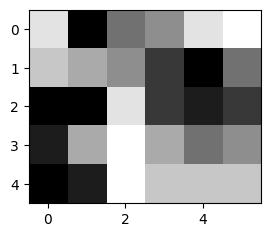

In [69]:
plt.figure(figsize=(3, 4))
plt.imshow(img, cmap=plt.cm.gray)

In [70]:
seg_img = img > 5
type(seg_img), seg_img

(numpy.ndarray,
 array([[ True, False, False, False,  True,  True],
        [ True,  True, False, False, False, False],
        [False, False,  True, False, False, False],
        [False,  True,  True,  True, False, False],
        [False, False,  True,  True,  True,  True]]))

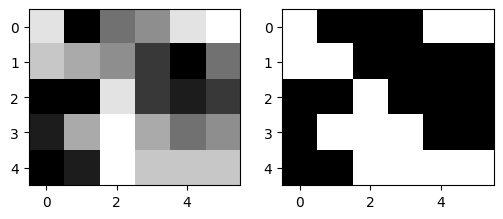

In [71]:
# plot each image ...
# ... side by side
fig = plt.figure(figsize=(6, 4))
fig.add_subplot(1, 2, 1)  # subplot one
plt.imshow(img, cmap=plt.cm.gray, vmin=0, vmax=9)

fig.add_subplot(1, 2, 2)  # subplot two
# my data is OK to use gray colormap (0:black, 1:white)
plt.imshow(seg_img, cmap=plt.cm.gray, vmin=0, vmax=1)  # use appropriate colormap here

In [72]:
integer_array = np.array([1, 2, 3, 7, 8, 9, 10])
X = integer_array.reshape(-1, 1)
# Create an instance of the KMeans class
kmeans = KMeans(n_clusters=2)
# Fit the K-means model to the data
kmeans.fit(X)
# Get the labels assigned by the K-means algorithm
labels = kmeans.labels_
# Get the cluster cluster_centers
cluster_centers = kmeans.cluster_centers_

print(labels)
print(cluster_centers)

[1 1 1 0 0 0 0]
[[8.5]
 [2. ]]


In [73]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.0.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: c:\users\hp\.conda\envs\pth\lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: cogdl, DeepXDE, greatx, karateclub, ogb, pygod, scikit-learn-intelex, scikit-optimize, scikit-plot, torch-geometric, yellowbrick


In [74]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(img)
labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_
print(labels)
print(cluster_centers)

[0 0 1 1 1]
[[7.5        3.         4.5        3.5        4.         6.5       ]
 [0.33333333 2.33333333 8.66666667 5.         4.         4.66666667]]


In [75]:
# img.flatten('F')
X = img.reshape((-1,1))
kmeans.fit(X)
labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_
print(labels)
print(cluster_centers)

[0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0]
[[6.52631579]
 [0.81818182]]


In [76]:
seg_img_kmeans = labels.reshape(img.shape)
seg_img_kmeans.shape

(5, 6)

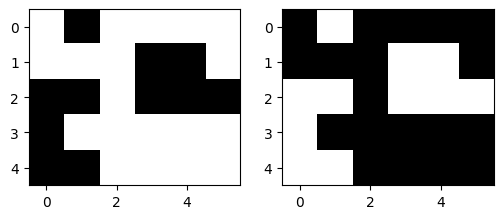

In [77]:
fig = plt.figure(figsize=(6, 4))
seg_img = img > 3
fig.add_subplot(1, 2, 1)  # subplot one
plt.imshow(seg_img, cmap=plt.cm.gray)  # use appropriate colormap here

fig.add_subplot(1, 2, 2)  # subplot two
plt.imshow(seg_img_kmeans, cmap=plt.cm.gray)  # use appropriate colormap here

## Using K-means cluster_centers, instead of K-means labels

In [78]:
seg_img_kmeans

array([[0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0],
       [1, 1, 0, 1, 1, 1],
       [1, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0]])

In [79]:
# seg_img_kmeans is the labels that was reshaped
seg_img_centers = np.zeros_like(img)
seg_img_centers[seg_img_kmeans == 0] = cluster_centers[0]
seg_img_centers[seg_img_kmeans == 1] = cluster_centers[1]
cluster_centers, seg_img_centers
# type(cluster_centers[0,0]), type(seg_img_centers[0,0])

(array([[6.52631579],
        [0.81818182]]),
 array([[6, 0, 6, 6, 6, 6],
        [6, 6, 6, 0, 0, 6],
        [0, 0, 6, 0, 0, 0],
        [0, 6, 6, 6, 6, 6],
        [0, 0, 6, 6, 6, 6]]))

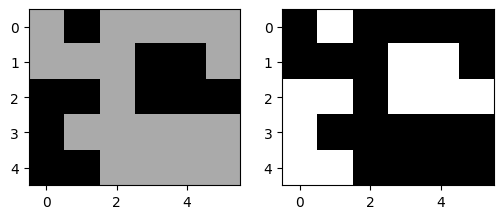

In [80]:
fig = plt.figure(figsize=(6, 4))
fig.add_subplot(1, 2, 1)  # subplot one
plt.imshow(seg_img_centers, cmap=plt.cm.gray, vmin=0, vmax=9)  # use appropriate colormap here

fig.add_subplot(1, 2, 2)  # subplot two
plt.imshow(seg_img_kmeans, cmap=plt.cm.gray)  # use appropriate colormap here

https://www.geeksforgeeks.org/image-segmentation-using-pythons-scikit-image-module/

In [81]:
# !pip install scikit-image

In [82]:
# Importing Necessary Libraries
from skimage import data
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

# Sample Image of scikit-image package
coffee = data.coffee()
coffee.shape, type(coffee[0, 0, 0])

((400, 600, 3), numpy.uint8)

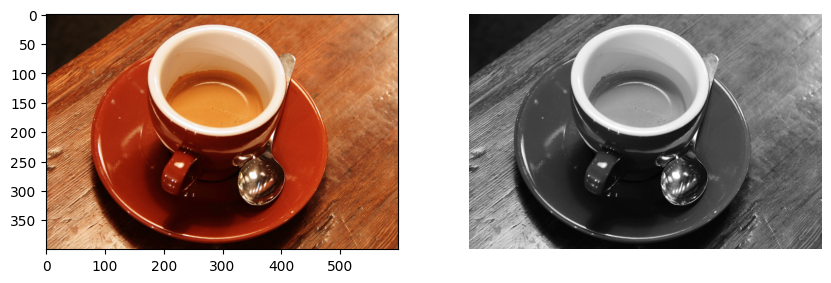

In [83]:
# Setting the plot size to 15,15
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)

# Displaying the sample image
plt.imshow(coffee)

# Converting RGB image to Monochrome
gray_coffee = rgb2gray(coffee)
plt.subplot(1, 2, 2)

# Displaying the sample image - Monochrome
# Format
plt.axis("off")
plt.imshow(gray_coffee, cmap="gray")

## Image segmentation by thresholding

Image Segmentation by K-Means

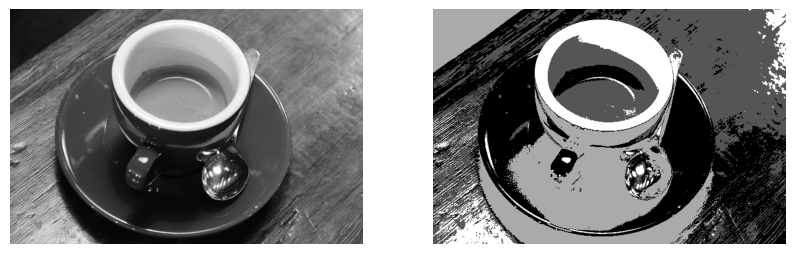

In [84]:
X = gray_coffee.reshape(-1,1)
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
labels = kmeans.labels_
seg_img_kmeans = labels.reshape(gray_coffee.shape)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.axis("off")
plt.imshow(gray_coffee, cmap="gray")

plt.subplot(1, 2, 2)
plt.axis("off")
plt.imshow(seg_img_kmeans, cmap="gray", vmin=0, vmax=3)

## Using K-means centers

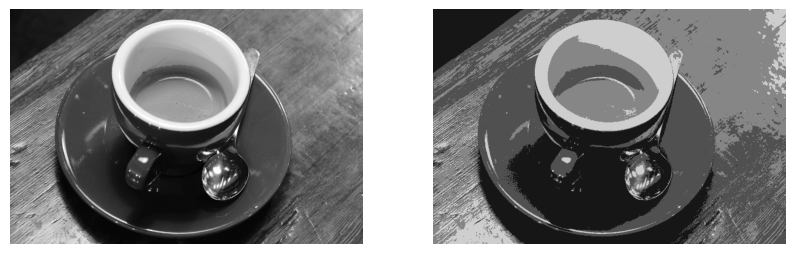

In [100]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

## New approach for replacing each pixel 
# with corresponding cluster center

seg_img_centers = cluster_centers[labels]
seg_img_centers = seg_img_centers.reshape(gray_coffee.shape)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.axis("off")
plt.imshow(gray_coffee, cmap="gray")

plt.subplot(1, 2, 2)
plt.axis("off")
plt.imshow(seg_img_centers, cmap="gray", vmin=0, vmax=1)